### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna para identificar la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los DataFrames
datos_completos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar las primeras filas para verificar
datos_completos.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [4]:
# Ingreso total por cada tienda
"""
En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
"""
# Configuración de formato
pd.options.display.float_format = '{:,.0f}'.format

# Calcular el total de facturación para cada tienda

ingreso_tienda1= tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Organizo los ingresos de cada tienda en un DataFrame
ingresos = {
            'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
            'Ingreso':[tienda1['Precio'].sum(),
                       tienda2['Precio'].sum(),
                       tienda3['Precio'].sum(),
                       tienda4['Precio'].sum()
                      ]
            }

df_ingresos = pd.DataFrame(ingresos)
df_ingresos


,Tienda,Ingreso
0,Tienda1,"1,150,880,400"
1,Tienda2,"1,116,343,500"
2,Tienda3,"1,098,019,600"
3,Tienda4,"1,038,375,700"


## Gráfico

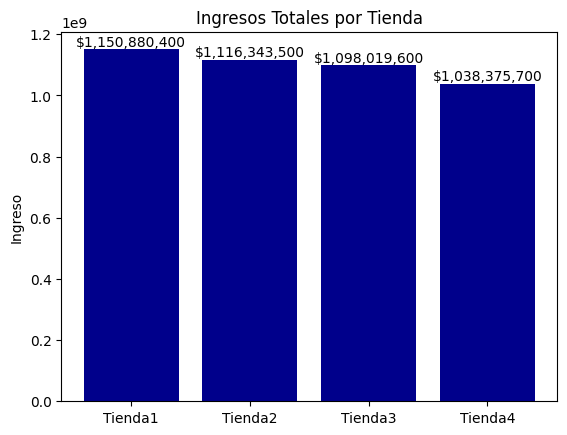

In [5]:
plt.figure()
barras = plt.bar(ingresos['Tienda'], ingresos['Ingreso'], color = 'darkblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingreso')

# Agregar etiquetas con los valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    texto = f"${altura:,.0f}"  # separador de miles y sin decimales
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, texto,
             ha='center', va='bottom')

plt.show()

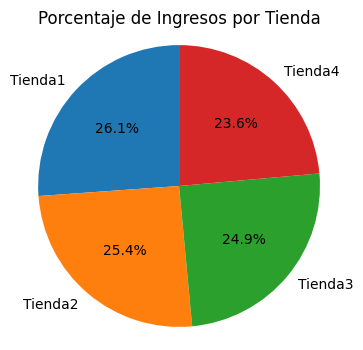

In [6]:
plt.figure(figsize=(4,4))
plt.pie(ingresos['Ingreso'], labels=ingresos['Tienda'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Ingresos por Tienda')
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()

# 2. Ventas por categoría

In [7]:
ventas_categoria = datos_completos.pivot_table(
    index="Categoría del Producto",
    columns="Tienda",
    values="Precio",
    aggfunc="count"
)

# Ordenar por total de ventas en todas las tiendas
ventas_categoria["Total"] = ventas_categoria.sum(axis=1) # Calcular el total por categoría (fila)
ventas_categoria = ventas_categoria.sort_values(by="Total", ascending=True) # Ordeno de menor a mayor por la columna Total
ventas_categoria = ventas_categoria.drop(columns="Total")   # quita la columna llamada "Total".

ventas_categoria.head(10)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Libros,173,197,185,187
Instrumentos musicales,182,224,177,170
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Juguetes,324,313,315,338
Electrónicos,448,422,451,451
Muebles,465,442,499,480


## Gráfico

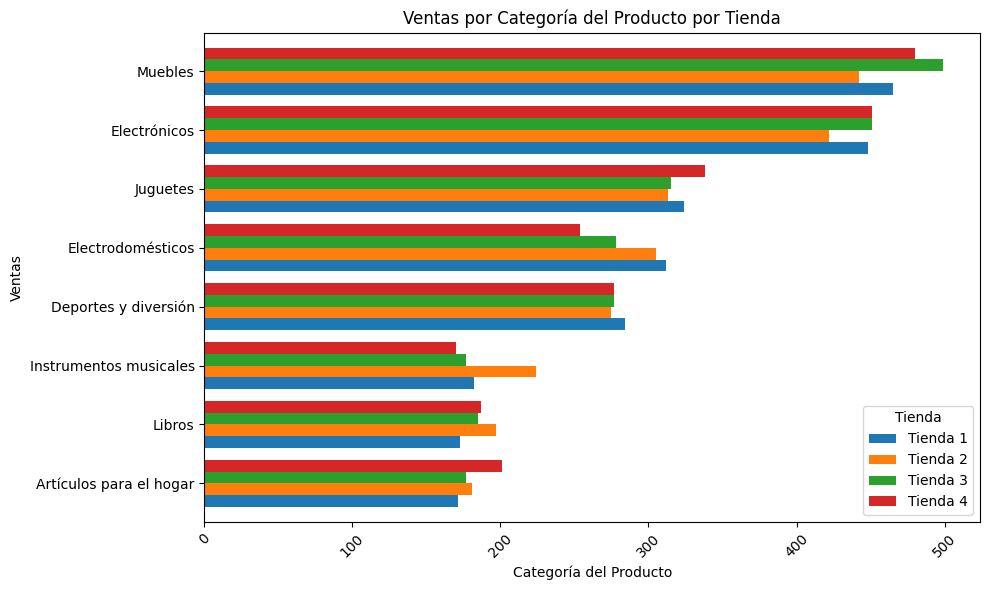

In [8]:
ventas_categoria.plot(kind="barh", width = 0.8 ,figsize=(10, 6))
plt.title("Ventas por Categoría del Producto por Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [9]:
# Calcular la calificación promedio de cada tienda
promedio_calificacion_tienda1 = tienda1['Calificación'].mean()
promedio_calificacion_tienda2 = tienda2['Calificación'].mean()
promedio_calificacion_tienda3 = tienda3['Calificación'].mean()
promedio_calificacion_tienda4 = tienda4['Calificación'].mean()

print(f"Calificación promedio tienda 1: {promedio_calificacion_tienda1.round(2)}")
print(f"Calificación promedio tienda 2: {promedio_calificacion_tienda2.round(2)}")
print(f"Calificación promedio tienda 3: {promedio_calificacion_tienda3.round(2)}")
print(f"Calificación promedio tienda 4: {promedio_calificacion_tienda4.round(2)}")

Calificación promedio tienda 1: 3.98
Calificación promedio tienda 2: 4.04
Calificación promedio tienda 3: 4.05
Calificación promedio tienda 4: 4.0


In [10]:
calificacion_promedio = {
              'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
              'Calificación Promedio':[tienda1['Calificación'].mean(),
                                       tienda2['Calificación'].mean(),
                                       tienda3['Calificación'].mean(),
                                       tienda4['Calificación'].mean()
                                      ]
              }

df_calificacion_promedio = pd.DataFrame(calificacion_promedio)
df_calificacion_promedio

,Tienda,Calificación Promedio
0,Tienda1,4
1,Tienda2,4
2,Tienda3,4
3,Tienda4,4


## Gráfico

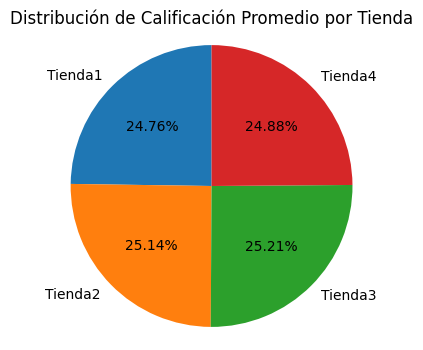

In [11]:
# Datos
labels = calificacion_promedio["Tienda"]
sizes = calificacion_promedio["Calificación Promedio"]

# Crear el gráfico
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Distribución de Calificación Promedio por Tienda")
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()


# 4. Productos más y menos vendidos


Tienda 1 - Productos más vendidos: 
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Precio, dtype: int64

Tienda 1 - Productos menos vendidos: 
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Precio, dtype: int64


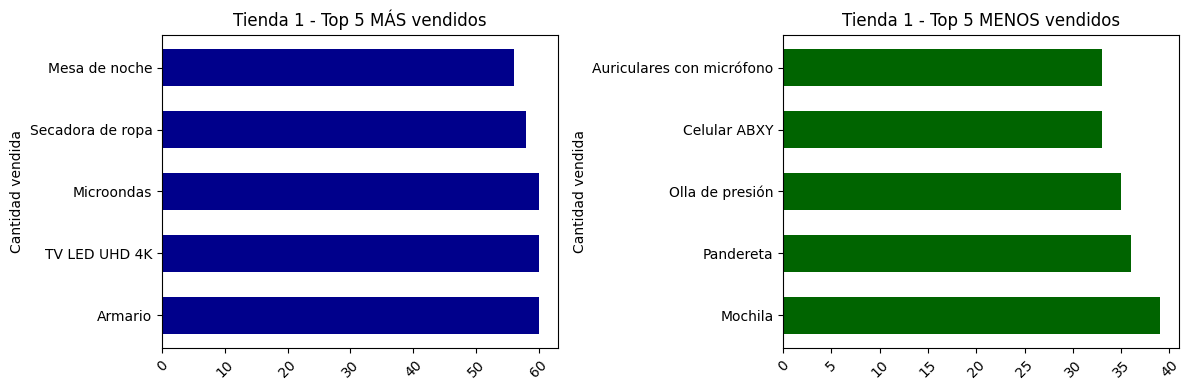


Tienda 2 - Productos más vendidos: 
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Precio, dtype: int64

Tienda 2 - Productos menos vendidos: 
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Precio, dtype: int64


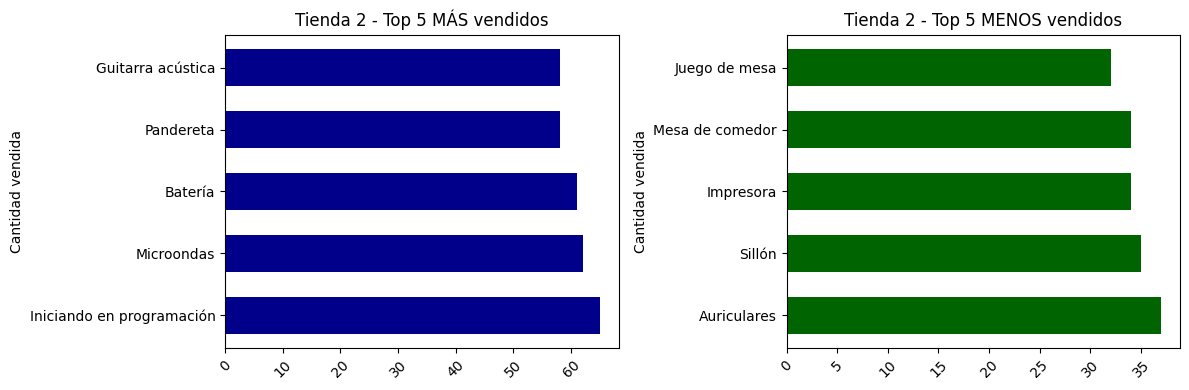


Tienda 3 - Productos más vendidos: 
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Precio, dtype: int64

Tienda 3 - Productos menos vendidos: 
Producto
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35
Name: Precio, dtype: int64


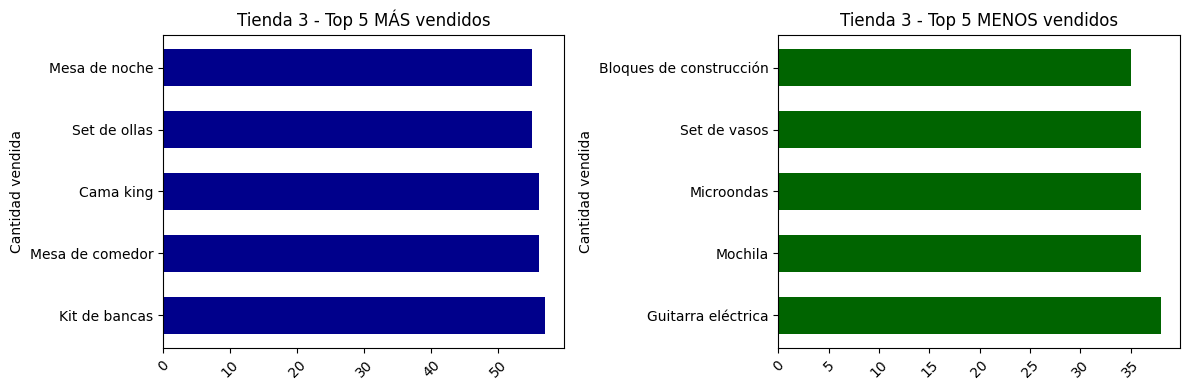


Tienda 4 - Productos más vendidos: 
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Name: Precio, dtype: int64

Tienda 4 - Productos menos vendidos: 
Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: Precio, dtype: int64


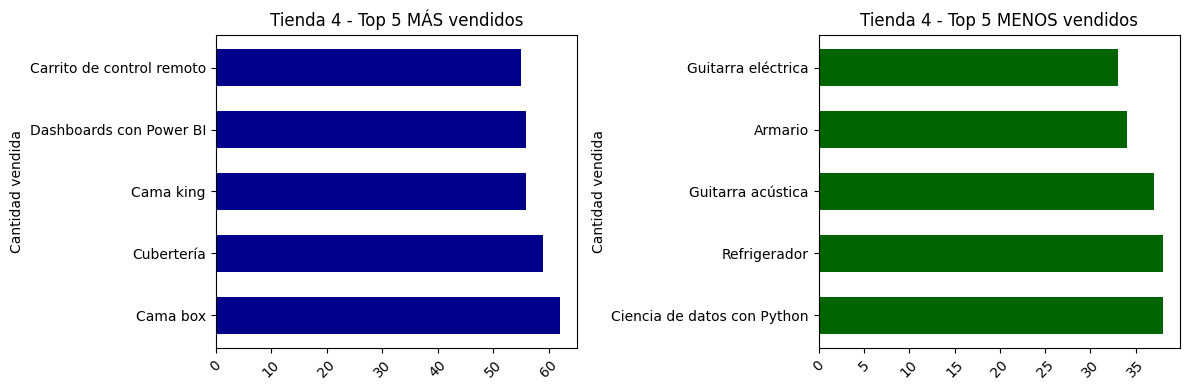

In [41]:
# Función para encontrar los productos más y menos vendidos
def productos_mas_menos_vendidos(df, tienda_num):
    ventas_por_producto = df.groupby('Producto')['Precio'].count().sort_values(ascending=False) #ordena de mayor a menos
    mas_vendidos = ventas_por_producto.head(5)
    menos_vendidos = ventas_por_producto.tail(5)
    print(f"\nTienda {tienda_num} - Productos más vendidos: ")
    print(mas_vendidos)
    print(f"\nTienda {tienda_num} - Productos menos vendidos: ")
    print(menos_vendidos)

    # Crear subplots lado a lado
    fig, axs = plt.subplots(1, 2, figsize=(12,4))

    axs[0].barh(mas_vendidos.index, mas_vendidos.values, color="darkblue", height=0.6)
    axs[0].set_title(f"Tienda {tienda_num} - Top 5 MÁS vendidos")
    axs[0].set_ylabel("Cantidad vendida")
    axs[0].tick_params(axis='x', rotation=45)

    # Gráfico de menos vendidos
    axs[1].barh(menos_vendidos.index, menos_vendidos.values, color="darkgreen", height=0.6)
    axs[1].set_title(f"Tienda {tienda_num} - Top 5 MENOS vendidos")
    axs[1].set_ylabel("Cantidad vendida")
    axs[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Llamar a la función para cada tienda
productos_mas_menos_vendidos(tienda1, 1)
productos_mas_menos_vendidos(tienda2, 2)
productos_mas_menos_vendidos(tienda3, 3)
productos_mas_menos_vendidos(tienda4, 4)

# 5. Envío promedio por tienda

In [42]:
# Organizo los costos de envio de cada tienda en un DataFrame
costo_envio = {
              'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
              'Costo envio':[tienda1['Costo de envío'].mean(),
                             tienda2['Costo de envío'].mean(),
                             tienda3['Costo de envío'].mean(),
                             tienda4['Costo de envío'].mean()
                            ]
              }

df_costo_envio_prom = pd.DataFrame(costo_envio)
df_costo_envio_prom


,Tienda,Costo envio
0,Tienda1,"26,019"
1,Tienda2,"25,216"
2,Tienda3,"24,806"
3,Tienda4,"23,459"


## Gráfico

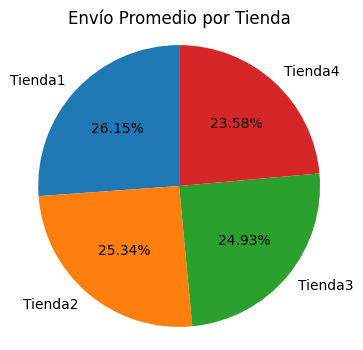

In [38]:
# Datos
labels = df_costo_envio_prom["Tienda"]
sizes = df_costo_envio_prom["Costo envio"]

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Envío Promedio por Tienda")
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()

## INFORME FINAL

## Introducción


🧭 **Descripción del problema**

El Sr. Juan ha solicitado un análisis del rendimiento de cada sucursal con el fin de identificar qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.


🎯 **Objetivos**

El objetivo principal es identificar cuál tienda debería ser vendida, evaluando los siguientes aspectos clave:

- Los ingresos totales de las tiendas 💰
- Categorias de productos vendidos 🛍️
- Calificaciones promedio de las tiendas ⭐
- Los productos más y menos vendidos 🔝
- Costo de envío promedio por tienda 🚚

## 📊 Resultados del análisis

## 💰 Ingresos por tienda
El total de ingresos generados por las cuatro tiendas asciende a $4,403,619,200.00 pesos. La distribución es la siguiente:

- Tienda uno   : 26.1% **(mayores ingresos)**
- Tienda dos   : 25.4%
- Tienda tres  : 24.9%
- Tienda cuatro: 23.6% **(menores ingresos)**


En este punto se realiza un análisis considerando la relación entre las ventas efectuadas por cada una de las tiendas.

A partir del análisis, se observa la que la tienda 4 presenta un menor desempeño en comparación a las otras tiendas. Registrandose una diferencia de $112.504.700 un 2.5% menos con la tienda con mayores ganancias.

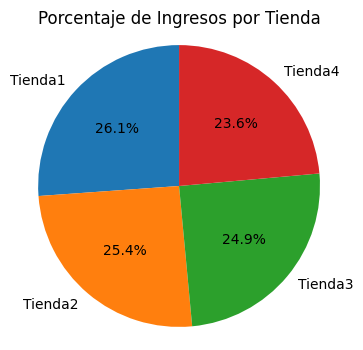

## 🛍️ Categorias de productos vendidos

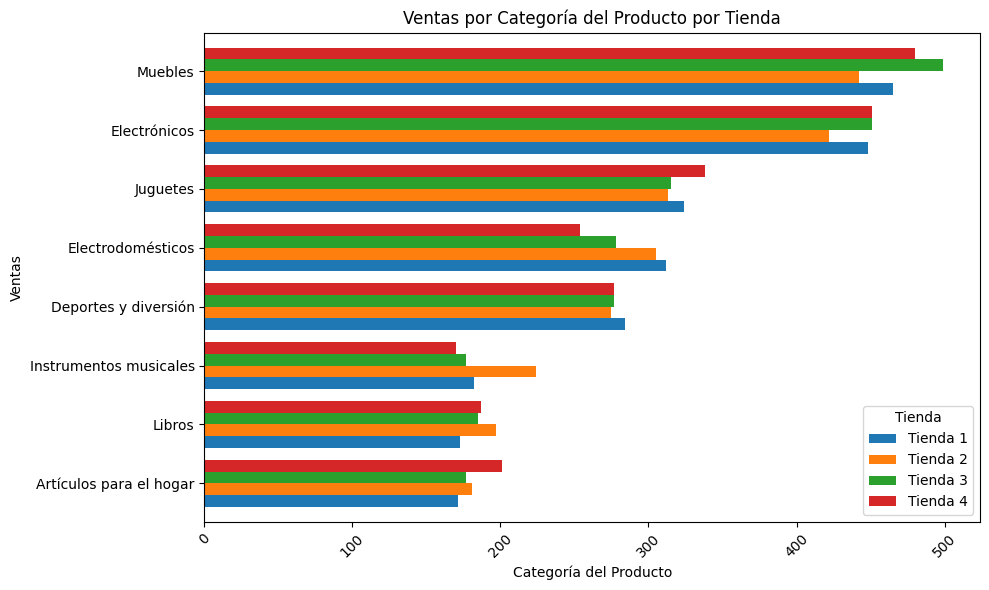

El análisis de las ventas por categoría se realizó considerando la cantidad de productos vendidos.
A través de este análisis podemos concluir:

- En todas las tiendas, "Muebles" y "Electrónicos" son consistentemente las categorías más vendidas.
- El item "Juguetes", muestra cierta variabilidad entre tiendas, siendo más alta en la Tienda 4 (338 unidades) y más baja en la Tienda 2 (313 unidades).
- El item "Electrodomésticos" y "Deportes y diversión" presentan fluctuaciones moderadas.
- Esto deja en último lugar los libros, artículos para el hogar y los instrumentos musicales.
- Podemos observar que la Tienda 2 presenta los valores más bajos en las 3 categorías de más alta demanda.

## ⭐ Calificaciones de las tiendas

Calificación promedio tienda 1: 3.98

Calificación promedio tienda 2: 4.04

Calificación promedio tienda 3: 4.05

Calificación promedio tienda 4: 4.0

- Tienda 2 y Tienda 3 tienen las mejores calificaciones, lo cual puede deberse a una estrategia centrada en mejor atención, experiencia o calidad del producto. ✅
- En el caso de la Tienda 2, aunque vende menos unidades, está bien posicionada en calidad y calificación promedio.
- Tienda 4 tiene la segunda menor calificación y el ingreso por unidad más bajo, lo que puede indicar una satisfacción mas baja de los clientes.
- Tienda 1 tiene buen volumen e ingresos, pero la menor calificación (3.98). Esto puede ser una señal que se está vendiendo mucho, pero está afectando la experiencia del cliente.

##🔝 Productos más y menos vendidos

🎯 Objetivo

Analizar el comportamiento de ventas por producto para identificar los artículos con mayor y menor rotación en cada tienda, con el fin de tomar decisiones estratégicas sobre inventario, promoción y catálogo.

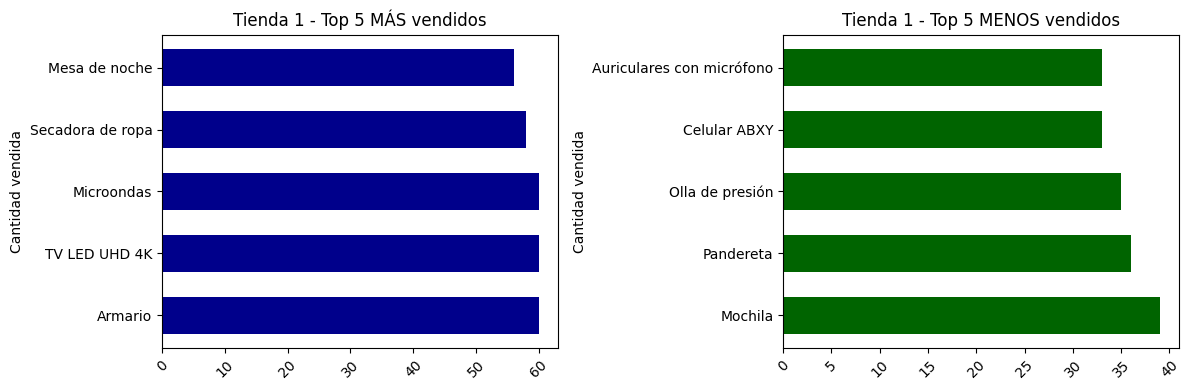

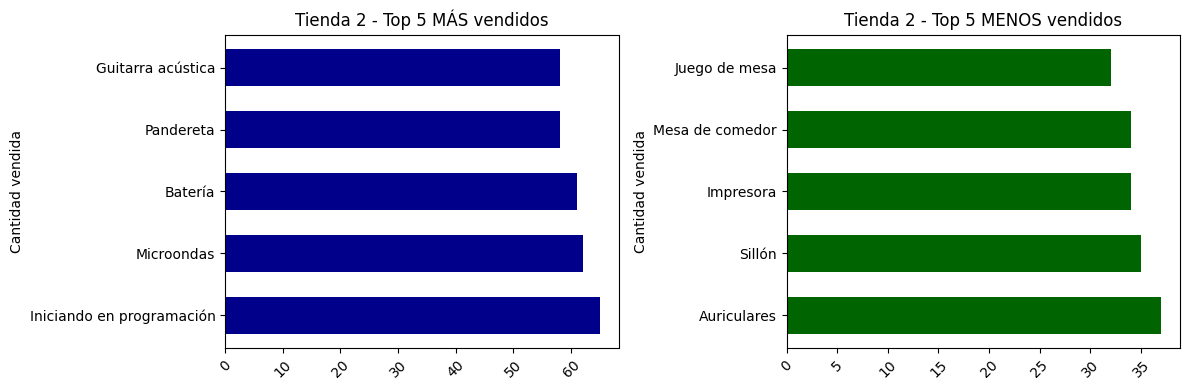

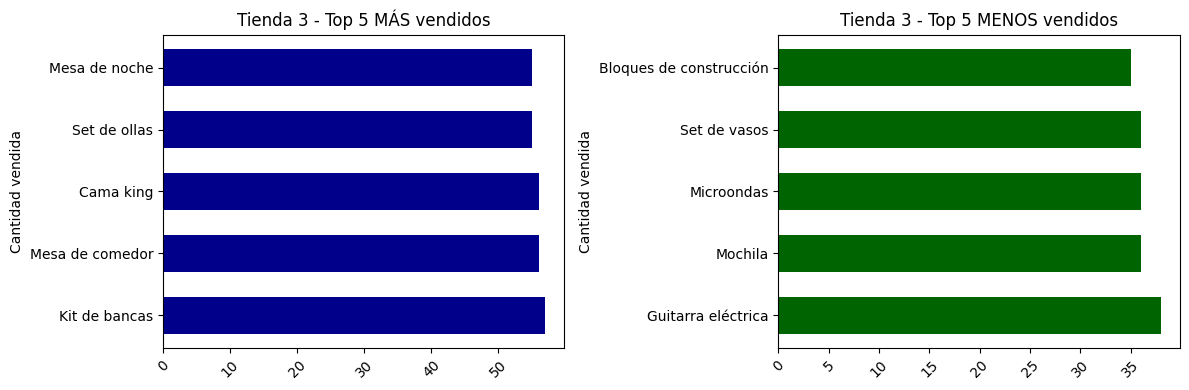

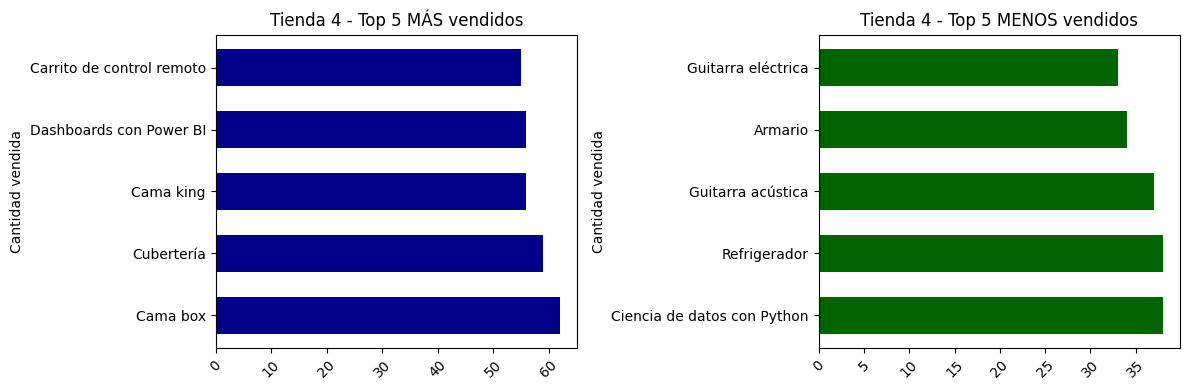

En este punto se realizó un análisis de los productos más y menos vendidos haciendo un ranking por cada tienda.
Esta información complementa la visión general de las categorías y permite identificar oportunidades de mejora o productos con bajo rendimiento.

- Como conclusión podemos indicar que los productos con mayor demanda se puede deber:

 - Necesidad frecuente.
 - Buen posicionamiento en tienda o campañas.
 - Excelente relación precio-calidad.

- La tienda 4 se puede observar que la categoría "Electrónicos" no figura en el top 5 más vendidos, a diferencia de las otras 3 tiendas.


## 🚚 Costo de envío promedio por tienda

Se realizó un análisis del costo promedio de envio en todas las tiendas.
Podemos concluir:

- Se observa que la tienda 1 tiene el mayor costo relacionado con el envio de los productos con un valor de $26.019. Esto puede deberse a que los artículos más vendidos de esta tienda son "Muebles" y "Electrónicos" que pueden ser de mayor tamaño, lo que puede generar un mayor costo de envío debido a sus dimensiones y peso.

- También podemos obsevar que la tienda 4 tine el menos costo de envio con un costo de $23.459.

# ✅ Conclusiones y Recomendaciones.

El análisis sugiere que la tienda número 4 es la mejor opción para ser vendida, debido a las siguientes razones:

- Es la que menos ingresos genera, es la menos rentable.
- Tiene menos volumen de ventas.
- La satisfacción de cliente no destaca significativamente frente a las demás.


En resumen, vender la tienda número 4 tendría un impacto controlado en el negocio del Sr. Juan, permitiéndole continuar con operaciones eficientes y enfocarse en mejorar las tiendas restantes.
Se recomienda hacer otros análisis más exhaustivos para poder determinar con certeza cual es la tienda que el Sr. Juan debe cerrar.